# COVID-19 Status (Colombia)

##### Limpieza y ajuste de datos (Desarrollador)*

In [1]:
# Libraries import
from datetime import datetime
from plotly.offline import init_notebook_mode, iplot
import requests
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from googletrans import Translator
import matplotlib.pyplot as plt
import statsmodels.api as sn

In [2]:
# Dataset import - 'Datos abiertos COVID-19 (Colombia)'
data = pd.DataFrame.from_dict(requests.get('https://www.datos.gov.co/resource/gt2j-8ykr.json?$limit=999999999').json())
#data

In [3]:
# Data cleaning and adjusting

# FE DE ERRATAS (2020-05-03): --------------------------------------------------------------------------------------------------------------------------------------------------
#data.loc[(data['Edad'].str.contains('-   -'))] = None
    
data = data[~data['edad'].str.contains('-   -')]
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#translator = Translator()

data.columns = ['Id de caso', 'Fecha de notificación', 'Código DIVIPOLA', 'Ciudad de ubicación', 'Departamento', 'Estado', 'Edad', 'Sexo', 'Tipo', 'Severidad','País de procedencia', 'Fecha de inicio de síntomas', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web', 'Tipo de recuperación', 'Código departamento', 'Código país', 'Pertenecia Étnica', 'Fecha de defunción', 'Nombre Grupo Étnico']

for column in ['Ciudad de ubicación', 'Estado', 'Sexo', 'Tipo', 'Severidad', 'País de procedencia']:
    data[column] = data[column].str.capitalize()
    
for column in ['Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de defunción', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web']:
       data[column] = data[column].str.slice(0,10).replace(r'(\d+)-(\d+)-(\d+)', r'\1-\2-\3', regex=True).apply(lambda x: pd.to_datetime(x, dayfirst=True, errors='ignore'))

data.loc[(data['Edad'].str.contains('[a-zA-Z]+', regex=True)), 'Edad'] = 0
data['Clasificación de edad'] = pd.cut(x=data['Edad'].apply(lambda x: float(x)), bins=[-np.inf,10,20,30,40,50,60,70,80,90,np.inf], include_lowest=True, labels=['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80', '80 - 90', '90 - 100+'])

#data['País de procedencia'] = data['País de procedencia'].apply(Translator().translate, src='es', dest='en').apply(getattr, args=('text',))

data = data[['Id de caso', 'Fecha de reporte web', 'Fecha de diagnóstico', 'Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de recuperación', 'Fecha de defunción', 'Ciudad de ubicación', 'Departamento', 'Severidad', 'Estado', 'Edad', 'Clasificación de edad', 'Sexo', 'Pertenecia Étnica', 'Nombre Grupo Étnico', 'Tipo', 'Tipo de recuperación', 'País de procedencia', 'Código departamento', 'Código país', 'Código DIVIPOLA']]
data = data.set_index('Id de caso')

date = datetime.today().strftime('%Y-%m-%d')
data.to_csv(f'./Datasets/COVID-19 Status (Colombia) [{date}].csv', index = True)

def numbers(div):
    for i in range(0, len(ax.patches)//div, 1):
        height = 0
        for j in range(0, div, 1):
            height += ax.patches[j*(len(ax.patches)//div)+i].get_height()
        ax.text(ax.patches[i].get_x()+(ax.patches[i].get_width()/10),height+(height/100)+10, int(height), fontsize=7, color='dimgrey', rotation=90)

def numbers_H(div):
    for i in range(0, len(ax.patches)//div, 1):
        width = 0
        for j in range(0, div, 1):
            width += ax.patches[j*(len(ax.patches)//div)+i].get_width()
        ax.text(width+(width/100)+10,ax.patches[i].get_y()+(ax.patches[i].get_height()/10), int(width), fontsize=7, color='dimgrey', rotation=0)

In [4]:
# Test

#data['País de procedencia'].unique().apply(lambda x: Translator().translate(x, src='es', dest='en').text)
#Translator().translate('España', src='es', dest='en').text

In [5]:
# In-line plots libraries import

%matplotlib inline
init_notebook_mode(connected = True)

## Análisis Dataset - COVID-19 (Colombia)

### - Datos Abiertos COVID-19 (Colombia)

In [6]:
data

Fecha de reporte web Fecha de diagnóstico Fecha de notificación  \
Id de caso                                                                   
1                    2020-03-06           2020-03-06            2020-03-02   
2                    2020-03-09           2020-03-09            2020-03-06   
3                    2020-03-09           2020-03-09            2020-03-07   
4                    2020-03-11           2020-03-11            2020-03-09   
5                    2020-03-11           2020-03-11            2020-03-09   
...                         ...                  ...                   ...   
345750               2020-08-05           2020-08-04            2020-07-24   
345751               2020-08-05           2020-08-04            2020-07-24   
345752               2020-08-05           2020-08-04            2020-07-24   
345753               2020-08-05           2020-08-04            2020-07-24   
345754               2020-08-05           2020-08-04            2020-07-24   

           Fecha de inicio de síntomas Fecha de recuperación  \
Id de caso                                                     
1                  2020-02-27 00:00:00            2020-03-13   
2                  2020-03-04 00:00:00            2020-03-19   
3                  2020-02-29 00:00:00            2020-03-15   
4                  2020-03-06 00:00:00            2020-03-26   
5                  2020-03-08 00:00:00            2020-03-23   
...                                ...                   ...   
345750             2020-07-21 00:00:00                   NaT   
345751             2020-07-21 00:00:00                   NaT   
345752             2020-07-21 00:00:00                   NaT   
345753             2020-07-21 00:00:00                   NaT   
345754             2020-07-21 00:00:00                   NaT   

           Fecha de defunción  Ciudad de ubicación     Departamento Severidad  \
Id de caso                                                                      
1                         NaT          Bogotá d.c.      Bogotá D.C.      Leve   
2                         NaT  Guadalajara de buga  Valle del Cauca      Leve   
3                         NaT             Medellín        Antioquia      Leve   
4                         NaT             Medellín        Antioquia      Leve   
5                         NaT             Medellín        Antioquia      Leve   
...                       ...                  ...              ...       ...   
345750                    NaT      San josé de uré          Córdoba      Leve   
345751                    NaT             Montería          Córdoba      Leve   
345752                    NaT             Montería          Córdoba      Leve   
345753                    NaT             Montería          Córdoba      Leve   
345754                    NaT             Montería          Córdoba      Leve   

                Estado  ... Clasificación de edad Sexo Pertenecia Étnica  \
Id de caso              ...                                                
1           Recuperado  ...               10 - 20    F              Otro   
2           Recuperado  ...               30 - 40    M              Otro   
3           Recuperado  ...               40 - 50    F              Otro   
4           Recuperado  ...               50 - 60    M              Otro   
5           Recuperado  ...               20 - 30    M              Otro   
...                ...  ...                   ...  ...               ...   
345750            Casa  ...               30 - 40    F               NaN   
345751            Casa  ...               30 - 40    M               NaN   
345752            Casa  ...               30 - 40    M               NaN   
345753            Casa  ...               30 - 40    M               NaN   
345754            Casa  ...               40 - 50    M               NaN   

           Nombre Grupo Étnico         Tipo Tipo de recuperación  \
Id de caso                                          

### - Mapa de influencia - COVID-19 (Colombia) [Beta]

In [7]:
map_data = dict(
    type = 'choropleth',
    locations = data['País de procedencia'],
    locationmode = 'country names',
    colorscale = 'viridis',
    z = data['País de procedencia'].value_counts().tolist())

geo_map = go.Figure(data=[map_data])
iplot(geo_map)

### - Casos confirmados VS Departamento (Sexo)

In [8]:
data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0)

Sexo                                                    F      M
Departamento                                                    
Amazonas                                             1063   1461
Antioquia                                           20014  23356
Arauca                                                 57    194
Archipiélago de San Andrés Providencia y Santa ...     16     29
Atlántico                                           11365  12674
Barranquilla D.E.                                   14671  16953
Bogotá D.C.                                         58146  59647
Bolívar                                              1287   1620
Boyacá                                                624    681
Buenaventura D.E.                                     805   1360
Caldas                                                565    546
Caquetá                                               884    955
Cartagena D.T. y C.                                  7537   9104
Casanare                                              173    216
Cauca                                                1017   1311
Cesar                                                1664   2171
Chocó                                                1412   1691
Cundinamarca                                         5340   5301
Córdoba                                              3829   3945
Guainía                                                 6      8
Guaviare                                               15    107
Huila                                                 583    623
La Guajira                                           1171   1263
Magdalena                                            1193   1255
Meta                                                  903   2272
Nariño                                               4078   4698
Norte de Santander                                   1405   1894
Putumayo                                              562    697
Quindío                                               221    226
Risaralda                                            1119   1093
Santa Marta D.T. y C.                                2471   2630
Santander                                            2129   2958
Sucre                                                3145   3590
Tolima                                               1089   2114
Valle del Cauca                                     12495  13951
Vaupés                                                 27     34
Vichada                                                 1      4

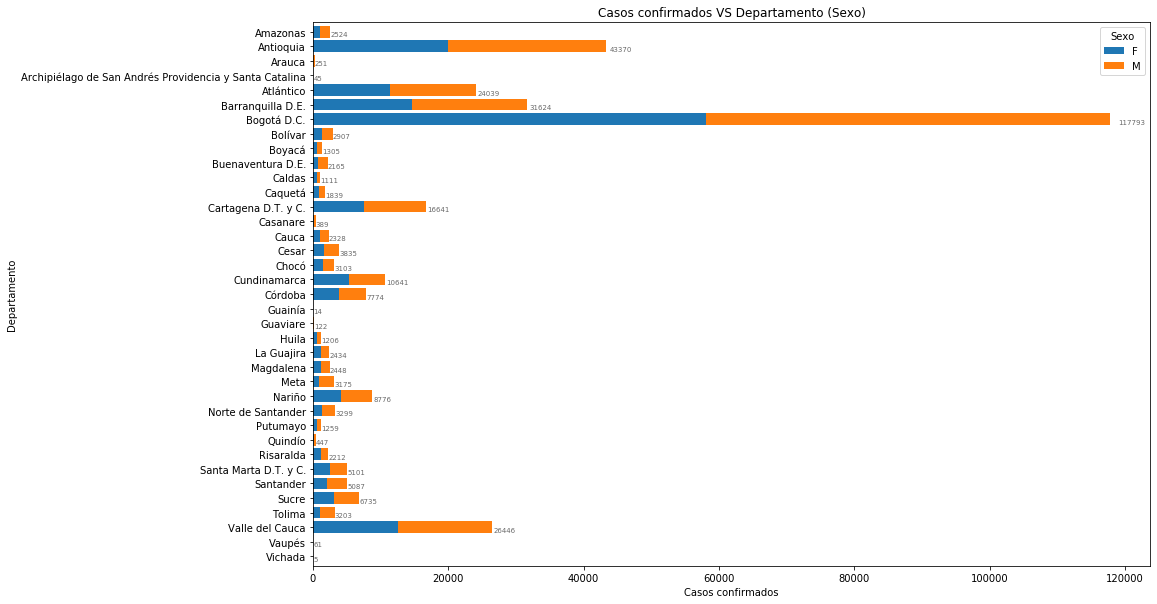

In [9]:
ax = data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Clasificación de edad)

In [10]:
data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad                               0 - 10  10 - 20  20 - 30  \
Departamento                                                                   
Amazonas                                               133      454      513   
Antioquia                                             1478     3022    11357   
Arauca                                                   9       52       93   
Archipiélago de San Andrés Providencia y Santa ...       0        1       14   
Atlántico                                             1089     1894     5157   
Barranquilla D.E.                                     1217     2092     6875   
Bogotá D.C.                                           5182     8927    26922   
Bolívar                                                143      277      661   
Boyacá                                                  70      139      274   
Buenaventura D.E.                                       46      284      499   
Caldas                                                  42       87      243   
Caquetá                                                 55      106      524   
Cartagena D.T. y C.                                    766     1233     3798   
Casanare                                                18       19      112   
Cauca                                                  102      189      539   
Cesar                                                  237      330      911   
Chocó                                                  131      274      740   
Cundinamarca                                           502      794     2471   
Córdoba                                                242      455     1590   
Guainía                                                  0        2        4   
Guaviare                                                 1       34       28   
Huila                                                   64      116      275   
La Guajira                                             129      238      504   
Magdalena                                              130      175      457   
Meta                                                    67      259      982   
Nariño                                                 386      728     2053   
Norte de Santander                                      94      153      763   
Putumayo                                                36      104      374   
Quindío                                                 14       24      109   
Risaralda                                              126      198      514   
Santa Marta D.T. y C.                                  207      353     1129   
Santander                                              182      332     1169   
Sucre                                                  275      535     1408   
Tolima                                                 137      191      868   
Valle del Cauca                                        867     1742     6036   
Vaupés                                                   4        5       19   
Vichada                                                  0        4        0   

Clasificación de edad                               30 - 40  40 - 50  50 - 60  \
Departamento                                                                    
Amazonas                                                481      344      278   
Antioquia                                             10934     6720     5159   
Arauca                                                   59       21        9   
Archipiélago de San Andrés Providencia y Santa ...       12       10        5   
Atlántico                                              5527     3820     3151   
Barranquilla D.E.                                      7497     4968     4244   
Bogotá D.C.                                           26061    19056    15999   
Bolívar                                                 677      406      268   
Boyacá                                                  249      206 

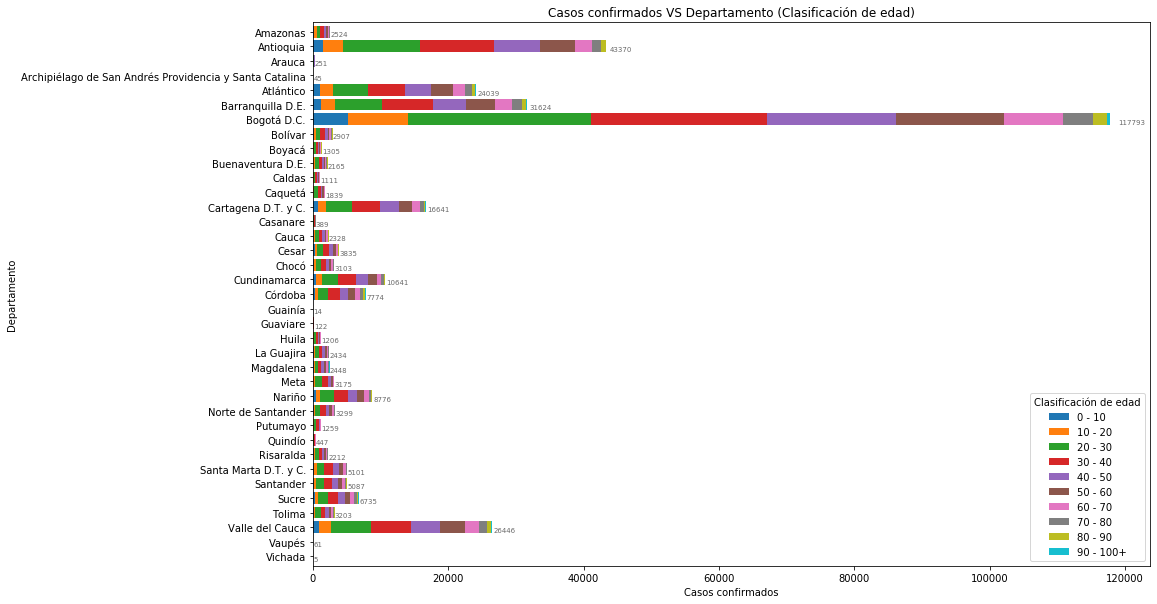

In [11]:
ax = data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Estado)

In [12]:
data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0)

Estado                                                 Casa  Fallecido  \
Departamento                                                             
Amazonas                                               51.0      104.0   
Antioquia                                           25165.0      712.0   
Arauca                                                 80.0        5.0   
Archipiélago de San Andrés Providencia y Santa ...     10.0        0.0   
Atlántico                                            4389.0     1105.0   
Barranquilla D.E.                                    5014.0     1515.0   
Bogotá D.C.                                         51490.0     3261.0   
Bolívar                                              1041.0      130.0   
Boyacá                                                611.0       30.0   
Buenaventura D.E.                                     184.0      147.0   
Caldas                                                650.0       15.0   
Caquetá                                              1269.0       43.0   
Cartagena D.T. y C.                                  2743.0      477.0   
Casanare                                              193.0        6.0   
Cauca                                                 940.0       78.0   
Cesar                                                1643.0       82.0   
Chocó                                                 411.0      108.0   
Cundinamarca                                         4174.0      287.0   
Córdoba                                              3683.0      773.0   
Guainía                                                 0.0        1.0   
Guaviare                                               61.0        0.0   
Huila                                                 578.0       27.0   
La Guajira                                            745.0      139.0   
Magdalena                                             554.0      224.0   
Meta                                                 1067.0       44.0   
Nariño                                               2659.0      290.0   
Norte de Santander                                   1787.0      166.0   
Putumayo                                              784.0       53.0   
Quindío                                               206.0        9.0   
Risaralda                                            1201.0       42.0   
Santa Marta D.T. y C.                                2079.0      171.0   
Santander                                            2607.0      163.0   
Sucre                                                1945.0      387.0   
Tolima                                               1267.0       70.0   
Valle del Cauca                                      8660.0      959.0   
Vaupés                                                  1.0        1.0   
Vichada                                                 3.0        0.0   

Estado                                              Hospital  Hospital uci  \
Departamento                                                                 
Amazonas                                                 6.0           4.0   
Antioquia                                             1565.0         164.0   
Arauca                                                   5.0           4.0   
Archipiélago de San Andrés Providencia y Santa ...       1.0           1.0   
Atlántico                                              512.0          78.0   
Barranquilla D.E.                                      720.0          78.0   
Bogotá D.C.                                           5928.0         320.0   
Bolívar                                                114.0          10.0   
Boyacá                                                  75.0           7.0   
Buenaventura D.E.                                      106.0          25.0   
Caldas                                                  43.0          10.0   
Caquetá                                                126.0           5.0   
Cartagena D.T. y C.  

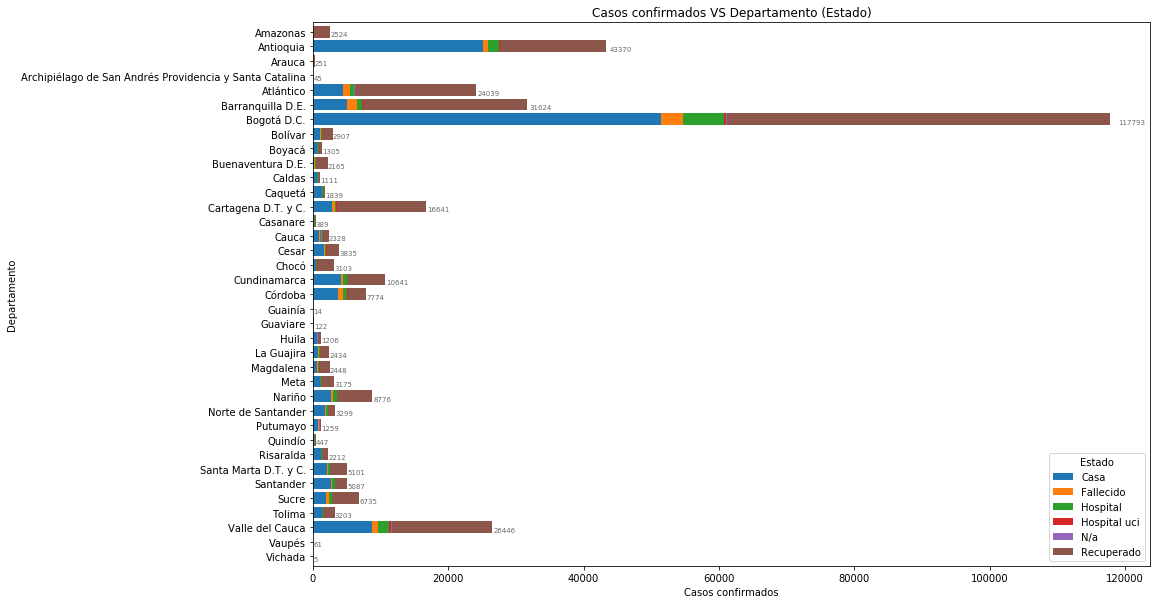

In [13]:
ax = data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Sexo)

In [14]:
data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0)

Sexo              F      M
Estado                    
Casa          63275  66670
Fallecido      4222   7402
Hospital       6629   8941
Hospital uci    535    999
N/a             308    416
Recuperado    88113  98204

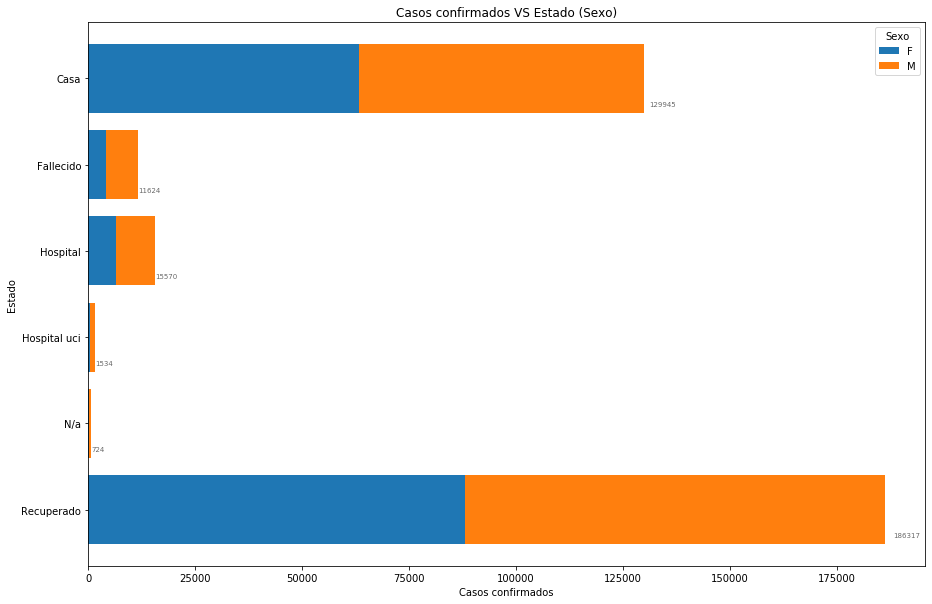

In [15]:
ax = data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Clasificación de edad)

In [16]:
data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Estado                                                                       
Casa                     5230    10092    32169    31966    21144    16200   
Fallecido                  24       20      162      398      896     1764   
Hospital                  618      317     1144     1799     2294     3226   
Hospital uci               70       26       61      159      235      369   
N/a                        21       15       34       29       55       88   
Recuperado               8218    15352    46415    45649    29881    22694   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Estado                                                       
Casa                      7861     3588     1434        261  
Fallecido                 2786     2932     2152        490  
Hospital                  3055     2016      961        140  
Hospital uci               347      206       56          5  
N/a                        146      156      139         41  
Recuperado               11087     4834     1894        293

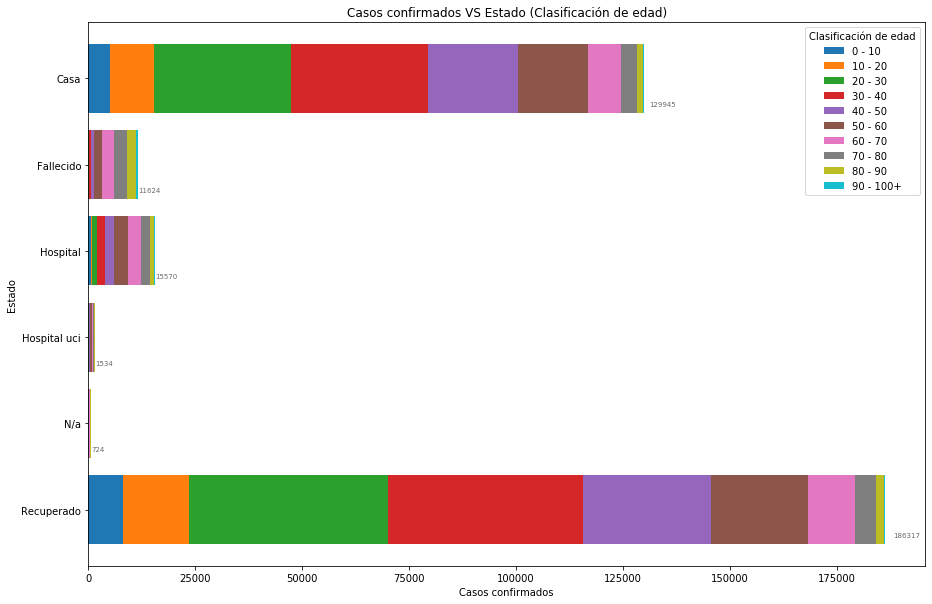

In [17]:
ax = data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo de contagio (Sexo)

In [18]:
data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0)

Sexo              F       M
Tipo                       
En estudio   156190  167206
Importado       456     520
Relacionado    6436   14906

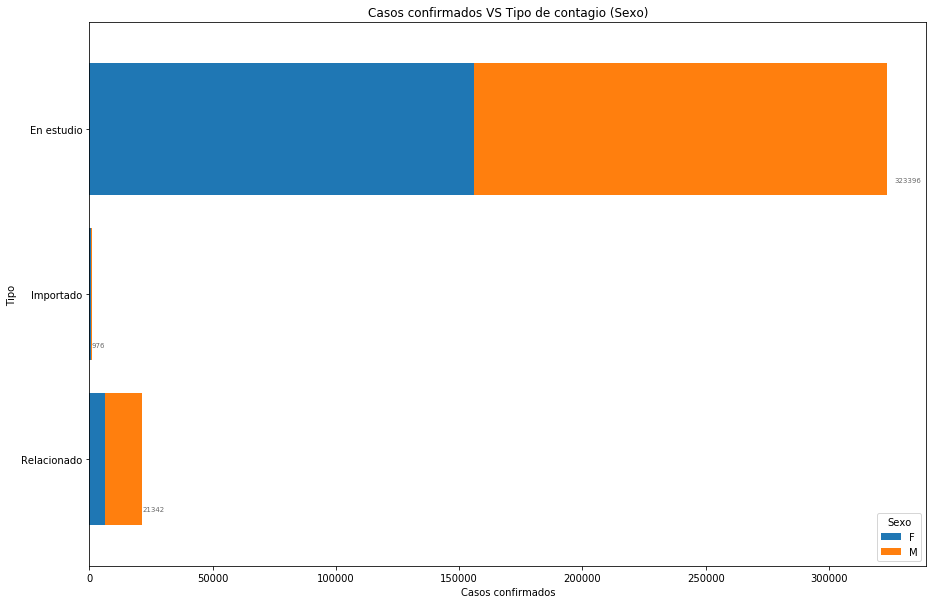

In [19]:
ax = data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo de contagio (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo (Clasificación de edad)

In [20]:
data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Tipo                                                                         
En estudio              13256    23275    73826    74576    51462    42152   
Importado                   6       38      241      229      173      150   
Relacionado               919     2509     5918     5195     2870     2039   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Tipo                                                         
En estudio               24148    13202     6337       1162  
Importado                   94       35        9          1  
Relacionado               1040      495      290         67

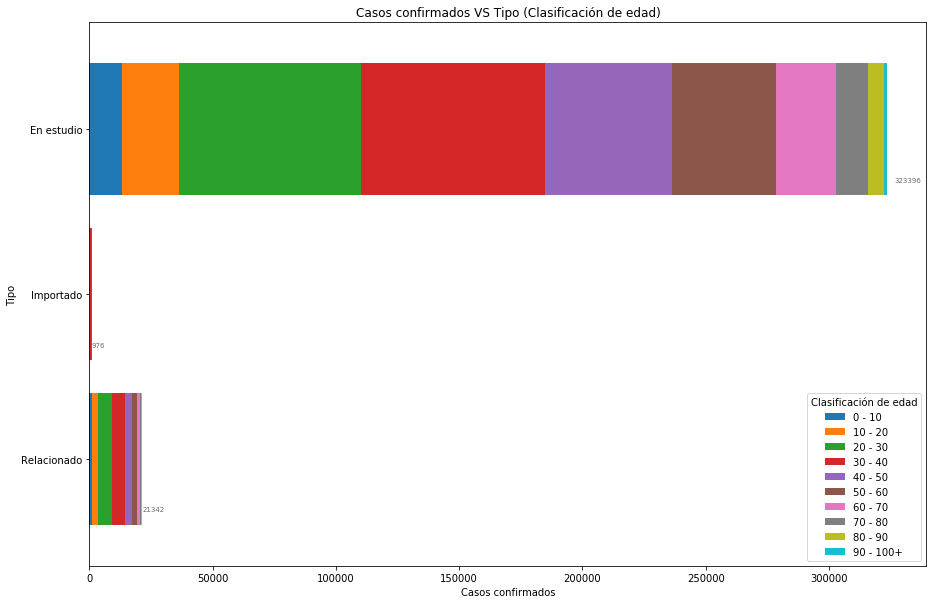

In [21]:
ax = data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Sexo)

In [22]:
data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0)

Sexo                       F      M
Clasificación de edad              
0 - 10                  6931   7250
10 - 20                12001  13821
20 - 30                38560  41425
30 - 40                37126  42874
40 - 50                25782  28723
50 - 60                20809  23532
60 - 70                11660  13622
70 - 80                 6237   7495
80 - 90                 3271   3365
90 - 100+                705    525

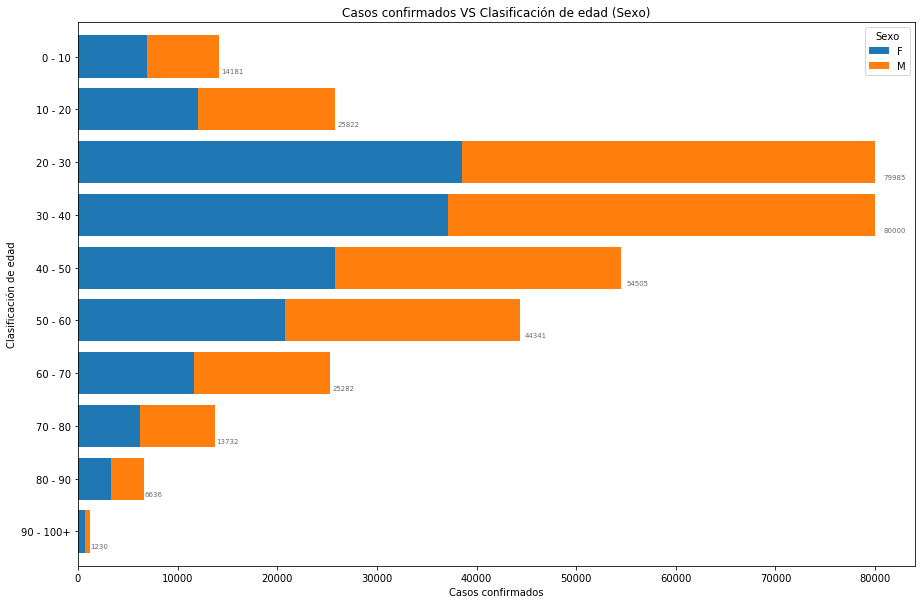

In [23]:
ax = data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Estado)

In [24]:
data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Clasificación de edad                                                  
0 - 10                  5230         24       618            70   21   
10 - 20                10092         20       317            26   15   
20 - 30                32169        162      1144            61   34   
30 - 40                31966        398      1799           159   29   
40 - 50                21144        896      2294           235   55   
50 - 60                16200       1764      3226           369   88   
60 - 70                 7861       2786      3055           347  146   
70 - 80                 3588       2932      2016           206  156   
80 - 90                 1434       2152       961            56  139   
90 - 100+                261        490       140             5   41   

Estado                 Recuperado  
Clasificación de edad              
0 - 10                       8218  
10 - 20                     15352  
20 - 30                     46415  
30 - 40                     45649  
40 - 50                     29881  
50 - 60                     22694  
60 - 70                     11087  
70 - 80                      4834  
80 - 90                      1894  
90 - 100+                     293

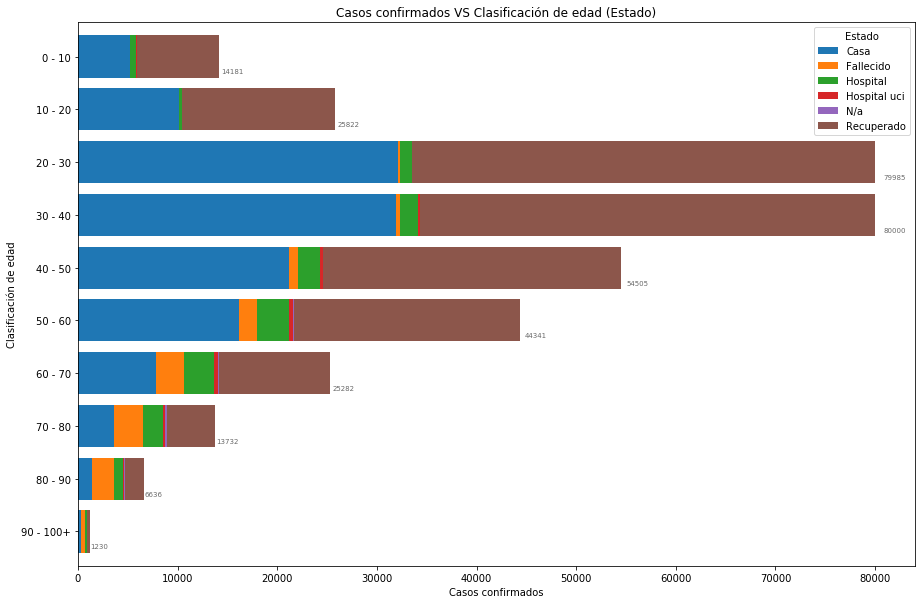

In [25]:
ax = data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Fecha de diagnóstico (Sexo)

In [26]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0)

Sexo                       F       M
Fecha de diagnóstico                
2020-03-06               1.0     0.0
2020-03-09               1.0     1.0
2020-03-11               4.0     2.0
2020-03-12               5.0     0.0
2020-03-13               2.0     3.0
...                      ...     ...
2020-08-01            4764.0  5056.0
2020-08-02            5294.0  5055.0
2020-08-03            3070.0  3210.0
2020-08-04            2996.0  3156.0
2020-08-05             221.0   215.0

[150 rows x 2 columns]

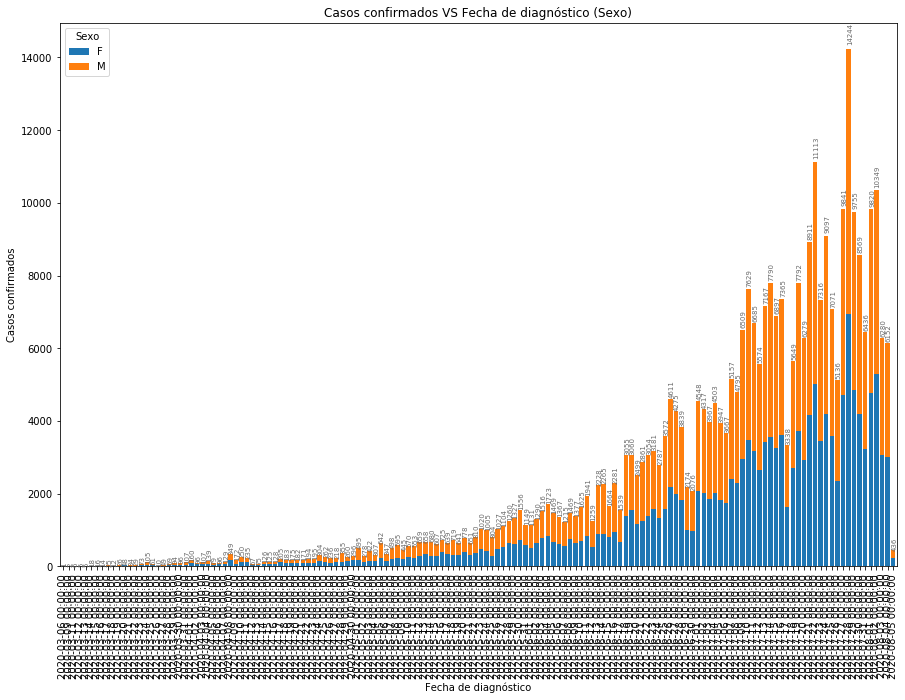

In [27]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)

In [28]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        0        0        1        1        0   
2020-03-11                  0        0        4        0        0        1   
2020-03-12                  0        0        0        1        1        1   
2020-03-13                  0        0        1        0        2        0   
...                       ...      ...      ...      ...      ...      ...   
2020-08-01                375      760     2385     2349     1508     1246   
2020-08-02                426      695     2341     2313     1744     1453   
2020-08-03                212      430     1384     1423      974      883   
2020-08-04                235      428     1370     1417      987      874   
2020-08-05                 15       22       94       98       69       69   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        0          0  
2020-03-13                   2        0        0          0  
...                        ...      ...      ...        ...  
2020-08-01                 649      358      160         30  
2020-08-02                 749      410      181         37  
2020-08-03                 504      302      145         23  
2020-08-04                 479      227      114         21  
2020-08-05                  36       21        9          3  

[150 rows x 10 columns]

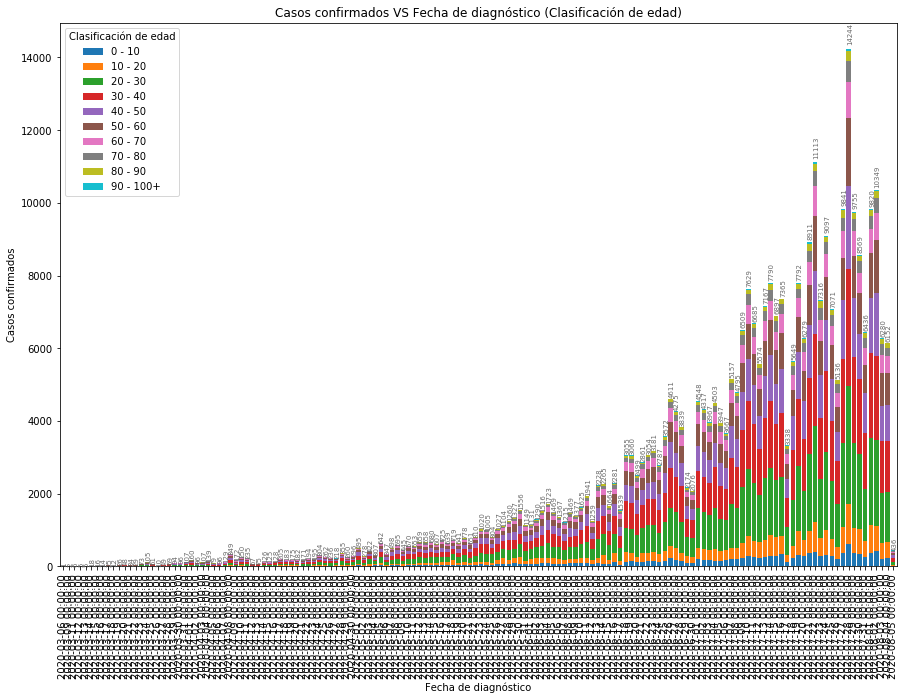

In [29]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Estado)

In [30]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Fecha de diagnóstico                                                   
2020-03-06               0.0        0.0       0.0           0.0  0.0   
2020-03-09               0.0        0.0       0.0           0.0  0.0   
2020-03-11               0.0        0.0       0.0           0.0  0.0   
2020-03-12               0.0        0.0       0.0           0.0  0.0   
2020-03-13               0.0        0.0       0.0           0.0  0.0   
...                      ...        ...       ...           ...  ...   
2020-08-01            9006.0      165.0     565.0          20.0  9.0   
2020-08-02            9584.0      160.0     575.0          10.0  6.0   
2020-08-03            5662.0       70.0     524.0          23.0  1.0   
2020-08-04            5733.0        4.0     397.0          18.0  0.0   
2020-08-05             398.0        0.0      36.0           2.0  0.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   2.0  
2020-03-11                   6.0  
2020-03-12                   5.0  
2020-03-13                   5.0  
...                          ...  
2020-08-01                  55.0  
2020-08-02                  14.0  
2020-08-03                   0.0  
2020-08-04                   0.0  
2020-08-05                   0.0  

[150 rows x 6 columns]

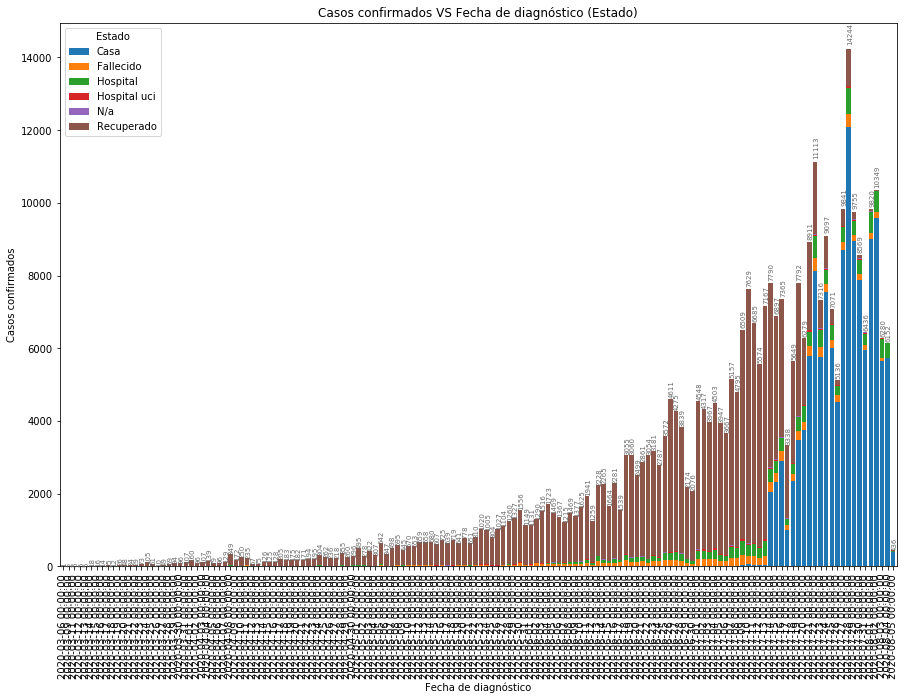

In [31]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)

In [32]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum()

Sexo                         F         M
Fecha de diagnóstico                    
2020-03-06                 1.0       0.0
2020-03-09                 2.0       1.0
2020-03-11                 6.0       3.0
2020-03-12                11.0       3.0
2020-03-13                13.0       6.0
...                        ...       ...
2020-08-01            149718.0  169014.0
2020-08-02            155012.0  174069.0
2020-08-03            158082.0  177279.0
2020-08-04            161078.0  180435.0
2020-08-05            161299.0  180650.0

[150 rows x 2 columns]

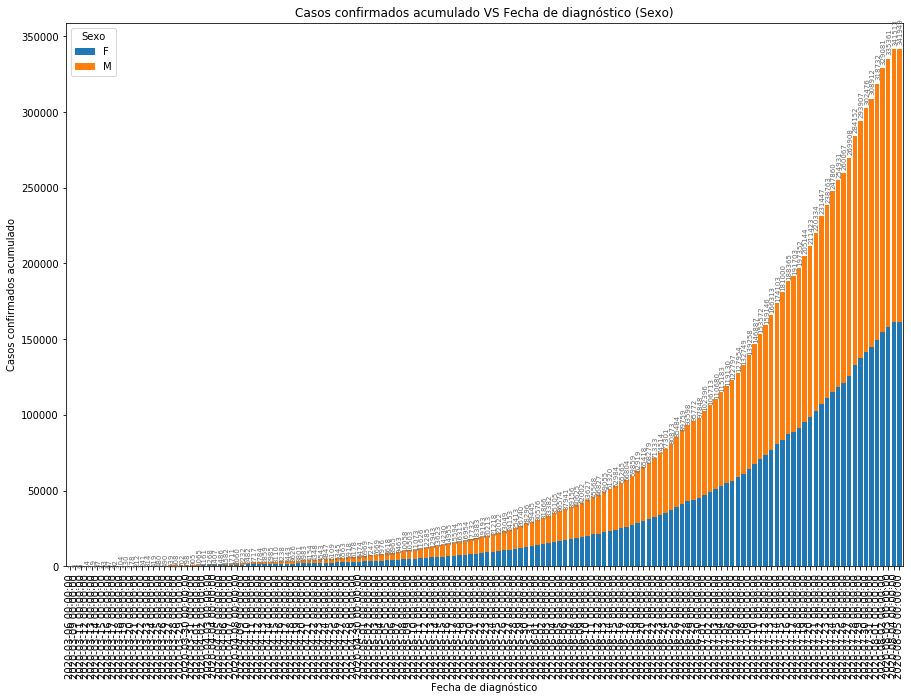

In [33]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Clasificación de edad)

In [34]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum()

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        1        0        1        1        0   
2020-03-11                  0        1        4        1        1        1   
2020-03-12                  0        1        4        2        2        2   
2020-03-13                  0        1        5        2        4        2   
...                       ...      ...      ...      ...      ...      ...   
2020-08-01              13160    23978    73906    73843    50177    40597   
2020-08-02              13586    24673    76247    76156    51921    42050   
2020-08-03              13798    25103    77631    77579    52895    42933   
2020-08-04              14033    25531    79001    78996    53882    43807   
2020-08-05              14048    25553    79095    79094    53951    43876   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        1          0  
2020-03-13                   3        1        1          0  
...                        ...      ...      ...        ...  
2020-08-01               23220    12613     6102       1136  
2020-08-02               23969    13023     6283       1173  
2020-08-03               24473    13325     6428       1196  
2020-08-04               24952    13552     6542       1217  
2020-08-05               24988    13573     6551       1220  

[150 rows x 10 columns]

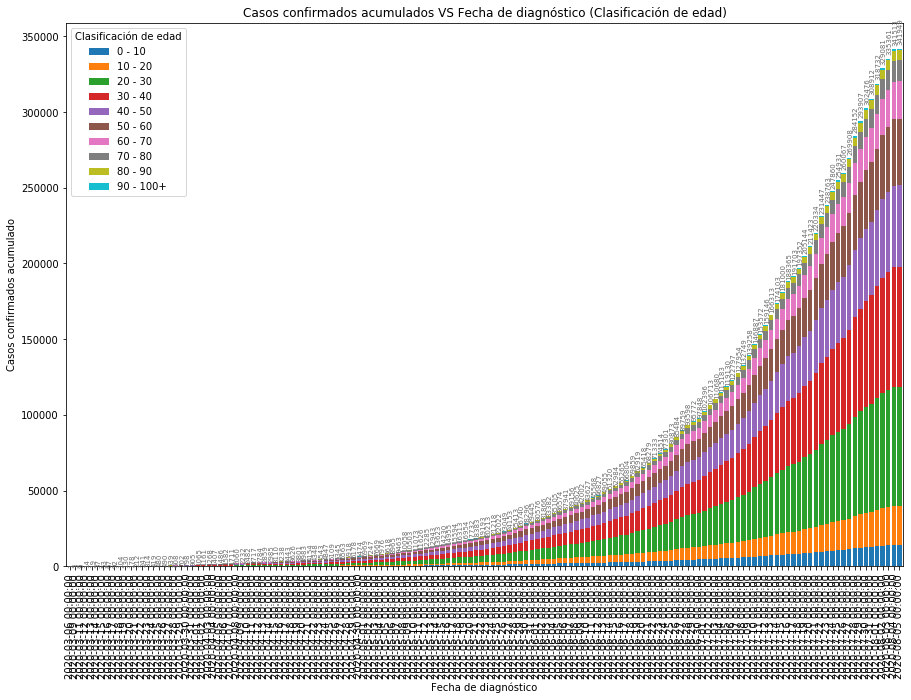

In [35]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Estado)

In [36]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum()

Estado                    Casa  Fallecido  Hospital  Hospital uci    N/a  \
Fecha de diagnóstico                                                       
2020-03-06                 0.0        0.0       0.0           0.0    0.0   
2020-03-09                 0.0        0.0       0.0           0.0    0.0   
2020-03-11                 0.0        0.0       0.0           0.0    0.0   
2020-03-12                 0.0        0.0       0.0           0.0    0.0   
2020-03-13                 0.0        0.0       0.0           0.0    0.0   
...                        ...        ...       ...           ...    ...   
2020-08-01            108529.0    11199.0   13911.0        1453.0  696.0   
2020-08-02            118113.0    11359.0   14486.0        1463.0  702.0   
2020-08-03            123775.0    11429.0   15010.0        1486.0  703.0   
2020-08-04            129508.0    11433.0   15407.0        1504.0  703.0   
2020-08-05            129906.0    11433.0   15443.0        1506.0  703.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   3.0  
2020-03-11                   9.0  
2020-03-12                  14.0  
2020-03-13                  19.0  
...                          ...  
2020-08-01              182944.0  
2020-08-02              182958.0  
2020-08-03              182958.0  
2020-08-04              182958.0  
2020-08-05              182958.0  

[150 rows x 6 columns]

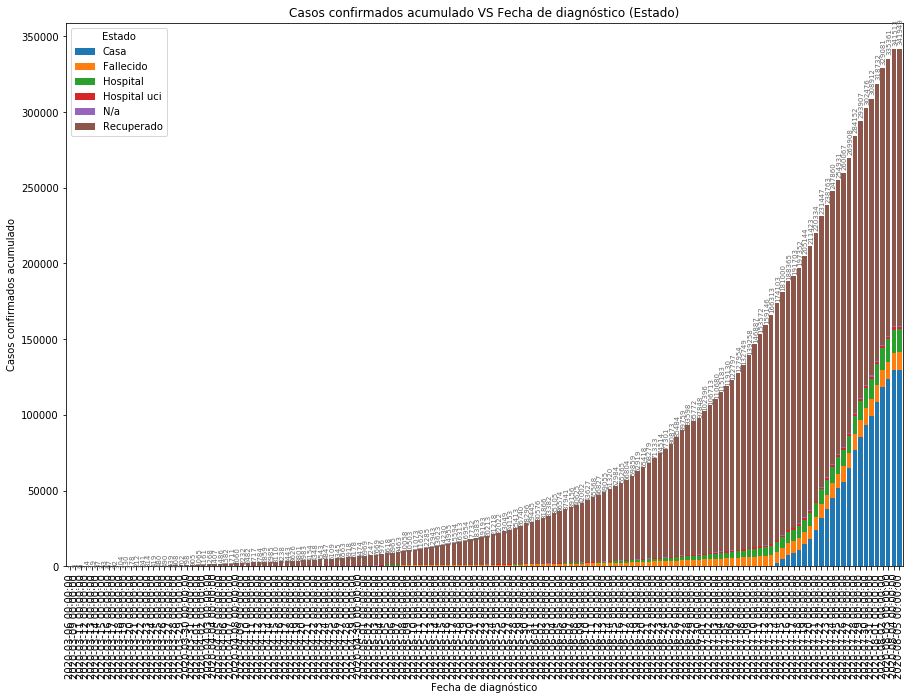

In [37]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Estado'].unique())
numbers(div)

## #StayHome #QuédateEnCasa

### Made with ♥ by <a href='https://github.com/jlcadavid'>@jlcadavid</a>